In [242]:
# Required Python packages for text analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import language_check
from textblob import TextBlob
from collections import Counter

In [342]:
df = pd.read_csv('aeg/training_set_rel3.tsv',sep='\t', encoding = "ISO-8859-1")

# Data analysis & Preprocessing

In [343]:
df.head() # top 5 view

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
df.columns #columns present in dataset

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
essay_id          12976 non-null int64
essay_set         12976 non-null int64
essay             12976 non-null object
rater1_domain1    12976 non-null int64
rater2_domain1    12976 non-null int64
rater3_domain1    128 non-null float64
domain1_score     12976 non-null int64
rater1_domain2    1800 non-null float64
rater2_domain2    1800 non-null float64
domain2_score     1800 non-null float64
rater1_trait1     2292 non-null float64
rater1_trait2     2292 non-null float64
rater1_trait3     2292 non-null float64
rater1_trait4     2292 non-null float64
rater1_trait5     723 non-null float64
rater1_trait6     723 non-null float64
rater2_trait1     2292 non-null float64
rater2_trait2     2292 non-null float64
rater2_trait3     2292 non-null float64
rater2_trait4     2292 non-null float64
rater2_trait5     723 non-null float64
rater2_trait6     723 non-null float64
rater3_trait1     128

In [246]:
cols_of_interes=['essay','essay_set','domain1_score'] # interested columns for use

In [347]:
df1=df[cols_of_interes]
df1.head()

,essay,essay_set,domain1_score
0,"Dear local newspaper, I think effects computer...",1,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,"Dear @LOCATION1, I know having computers has a...",1,8


In [348]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 3 columns):
essay            12976 non-null object
essay_set        12976 non-null int64
domain1_score    12976 non-null int64
dtypes: int64(2), object(1)
memory usage: 304.2+ KB


In [248]:
df1['domain1_score'].max() #maximum score of domain

60

In [249]:
df1['domain1_score'].min()

0

In [250]:
df1['essay_set'].value_counts()

5    1805
6    1800
2    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [251]:
df1.iloc[11]

essay            Dear @CAPS1 @CAPS2 I feel that computers do ta...
essay_set                                                        1
domain1_score                                                    8
Name: 11, dtype: object

In [252]:
df1['essay'][11]

"Dear @CAPS1 @CAPS2 I feel that computers do take away from peoples life and aren\x92t as important than the other factors of life. First of all you know that the world is becoming obease because of lack of exercise. Also people don't realize that @CAPS3 warming is becomeing a big problum. Finally familys arn't as close as they used to be. these are all the reasons why computers arn't important to human socioty. First of the world is becomeing obease and cumputers play a huge part in this. Computers don't make people exercise they basicly just sit down on there couch and use the computer this won't help amarica get back into shape. Also computers become a habbit if a person uses a computer everyday of there life it will become an addiction then they won't be able to stop. Finally when people use the computer they don't realize the lack exersise there getting. This is the first reason why computeres are a bad thing. Next @CAPS3 warming is mealting the polar ice caps. Computers play a pa

In [253]:
import nltk #important library for natural language work 


In [254]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mitra.nand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [255]:
from nltk.corpus import stopwords

In [256]:
# Custom feature genrations

def word_count(x):
    return len(TextBlob(x).words)
def sentence_count(x):
    sentence_len=len([len(sentence.split(" ")) for sentence in TextBlob(x).sentences])
    return sentence_len
def avg_sentence_centiment(x):
    sentiement_essay=TextBlob(x).sentiment.polarity
    return sentiement_essay
def average_len_word(x):
    word_len=[len(word) for word in TextBlob(x).words]
    return (sum(word_len)/len(word_len))
def grammar_check(x):
    tool=language_check.LanguageTool('en_us')
    matches=tool.check(x)
    return len(matches)

#word count without stop words
def word_countss(x):
    words = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    for word in words:
        if word in stop_words:
            words.remove(word)
    word_count = len(words)
    return word_count
#Number of characters
def number_of_characters(x):
    words=nltk.word_tokenize(x)
    noc=nltk.FreqDist(words).N()
    return noc

    
    

In [257]:
df1['no_of_character']=df1['essay'].apply(number_of_characters)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
df1['word_length']=df1['essay'].apply(word_count)
df1['no_of_sen']=df1['essay'].apply(sentence_count)
df1['sen_sentiemnt']=df1['essay'].apply(avg_sentence_centiment)
df1['avg_word_len']=df1['essay'].apply(average_len_word)
#df1['grammar_check']=df1['essay'].apply(grammar_check)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [259]:
df1['word_count']=df1['essay'].apply(word_countss)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
df1.head()  #new datasets with new features

,essay,essay_set,domain1_score,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count
0,"Dear local newspaper, I think effects computer...",1,8,386,343,16,0.310471,4.358601,272
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9,464,422,20,0.274000,4.331754,326
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7,313,283,14,0.340393,4.356890,223
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10,611,527,27,0.266828,4.851992,454
4,"Dear @LOCATION1, I know having computers has a...",1,8,517,470,30,0.199684,4.378723,361


In [261]:
df2=pd.read_csv('aeg/data.csv', sep='\t')
df2.head()

,Unnamed: 0,essay,domain1_score,word_length,no_of_sentence,sentiment_essay,avg_word_len,Grammar_check
0,0,"Dear local newspaper, I think effects computer...",8,343,16,0.310471,4.358601,11
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,422,20,0.274000,4.331754,19
2,2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,283,14,0.340393,4.356890,9
3,3,"Dear Local Newspaper, @CAPS1 I have found that...",10,527,27,0.266828,4.851992,35
4,4,"Dear @LOCATION1, I know having computers has a...",8,470,30,0.199684,4.378723,17


In [262]:
df1['Grammar_check']=df2['Grammar_check']

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [263]:
df1.head()

,essay,essay_set,domain1_score,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
0,"Dear local newspaper, I think effects computer...",1,8,386,343,16,0.310471,4.358601,272,11
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9,464,422,20,0.274000,4.331754,326,19
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7,313,283,14,0.340393,4.356890,223,9
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10,611,527,27,0.266828,4.851992,454,35
4,"Dear @LOCATION1, I know having computers has a...",1,8,517,470,30,0.199684,4.378723,361,17


In [ ]:
df1.to_csv("filterdata.csv",sep='\t') #save to filterdata.csv

In [291]:
df=pd.read_csv('filterdata.csv',sep='\t')

In [292]:
df.shape

(12976, 11)

In [293]:
df['domain1_score'].unique()

array([ 8,  9,  7, 10,  6, 12,  4,  3, 11,  2,  5,  1,  0, 15, 13, 17, 23,
       16, 18, 19, 14, 21, 24, 20, 22, 34, 46, 40, 30, 26, 41, 31, 44, 36,
       43, 45, 35, 42, 33, 38, 47, 32, 50, 39, 37, 55, 60, 28, 49, 29, 27,
       25, 48], dtype=int64)

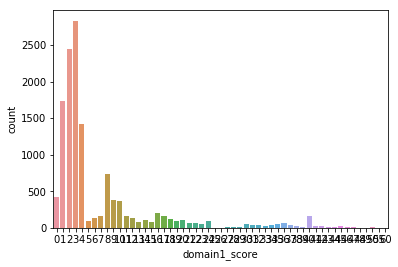

In [294]:
sns.countplot(x=df['domain1_score'])

In [295]:
def classify_score(x):
    if x>=0 and x<10:
        return '<10'
    elif x>=10 and x<20:
        return '10To20'
    elif x>=20 and x<30:
        return '20To30'
    elif x>=30 and x<40:
        return '30To40'
    else:
        return '40To50'

In [296]:
df2['scoreclass']=df['domain1_score'].apply(classify_score)

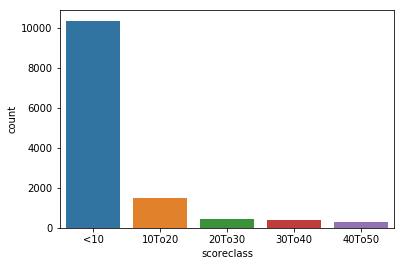

In [297]:
sns.countplot(x=df2['scoreclass'])

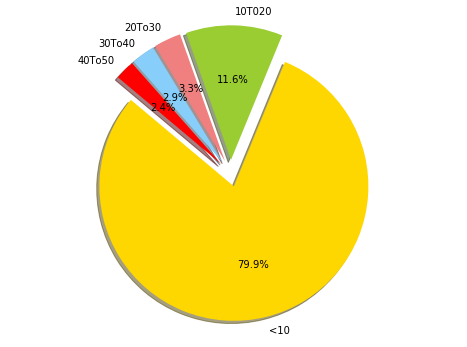

In [298]:
a=df2['scoreclass'].value_counts()
b=a.tolist()
plt.figure(figsize=(8,6))
explode = (0.1, 0.1, 0.1, 0.1,0.1)
label = ['<10','10T020','20To30','30To40','40To50']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.pie(a, explode=explode,colors=colors,labels=label ,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [299]:
df =df.drop('Unnamed: 0',axis=1)

In [300]:
df.describe()

,essay_set,domain1_score,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,4.179485,6.800247,252.472873,224.711621,12.716091,0.136558,4.291336,179.433261,10.499846
std,2.136913,8.970705,203.334065,178.371220,11.151927,0.167243,0.348358,145.421162,9.636707
min,1.000000,0.000000,2.000000,2.000000,1.000000,-1.000000,2.900000,2.000000,0.000000
25%,2.000000,2.000000,109.000000,99.000000,5.000000,0.036111,4.065014,77.000000,4.000000
50%,4.000000,3.000000,184.000000,164.000000,9.000000,0.126519,4.303325,131.500000,8.000000
75%,6.000000,8.000000,348.000000,311.000000,18.000000,0.225000,4.533835,246.000000,14.000000
max,8.000000,60.000000,1204.000000,1071.000000,96.000000,1.000000,5.909091,995.000000,128.000000


In [301]:
df.head(2)

,essay,essay_set,domain1_score,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
0,"Dear local newspaper, I think effects computer...",1,8,386,343,16,0.310471,4.358601,272,11
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9,464,422,20,0.274000,4.331754,326,19


In [302]:
df5=df.drop(['essay','essay_set'],axis=1)

In [303]:
df5.head()

,domain1_score,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
0,8,386,343,16,0.310471,4.358601,272,11
1,9,464,422,20,0.274000,4.331754,326,19
2,7,313,283,14,0.340393,4.356890,223,9
3,10,611,527,27,0.266828,4.851992,454,35
4,8,517,470,30,0.199684,4.378723,361,17


In [304]:
x=df5[['no_of_character','word_length','no_of_sen','sen_sentiemnt','avg_word_len','word_count','Grammar_check']]
y=df5['domain1_score']

In [315]:
y

0         8
1         9
2         7
3        10
4         8
5         8
6        10
7        10
8         9
9         9
10        8
11        8
12        7
13        6
14        6
15       12
16        8
17        8
18        4
19        6
20        8
21        3
22       10
23       11
24        8
25        9
26        4
27        9
28        9
29        8
         ..
12946    40
12947    32
12948    36
12949    31
12950    30
12951    47
12952    40
12953    35
12954    33
12955    36
12956    36
12957    48
12958    40
12959    40
12960    40
12961    42
12962    40
12963    32
12964    36
12965    40
12966    10
12967    33
12968    44
12969    35
12970    30
12971    35
12972    32
12973    40
12974    40
12975    40
Name: domain1_score, Length: 12976, dtype: int64

In [316]:
x

,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
0,386,343,16,0.310471,4.358601,272,11
1,464,422,20,0.274000,4.331754,326,19
2,313,283,14,0.340393,4.356890,223,9
3,611,527,27,0.266828,4.851992,454,35
4,517,470,30,0.199684,4.378723,361,17
5,273,246,15,0.172817,4.073171,192,15
6,580,507,30,0.113326,4.412229,414,5
7,556,494,39,0.262030,4.414980,405,5
8,512,451,35,0.247986,4.210643,366,11
9,561,514,26,-0.015800,4.054475,386,19


In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [318]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [319]:
X_train

,no_of_character,word_length,no_of_sen,sen_sentiemnt,avg_word_len,word_count,Grammar_check
2765,416,373,19,0.122689,3.989276,285,19
10892,362,308,29,0.108333,4.071429,276,22
4242,103,98,5,0.325000,4.142857,69,5
12665,1014,863,39,0.156397,4.290846,727,17
9089,155,142,4,0.142361,4.528169,109,5
4643,191,175,11,0.084762,4.480000,135,13
7849,159,144,5,0.359280,4.250000,106,11
7776,89,76,8,0.228571,4.000000,65,6
10152,164,148,8,0.231818,4.668919,116,8
11514,130,121,8,-0.006667,4.289256,93,6


In [320]:
lr=LinearRegression(normalize=False) #Linear regression model
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

                 Coefficient
no_of_character    -0.162008
word_length         0.006014
no_of_sen          -0.064352
sen_sentiemnt      -1.333448
avg_word_len       -9.851943
word_count          0.265208
Grammar_check      -0.118008
[ 3.06917117  3.03090166  4.13706744 ...  2.28672646  7.78087292
 14.88968505]


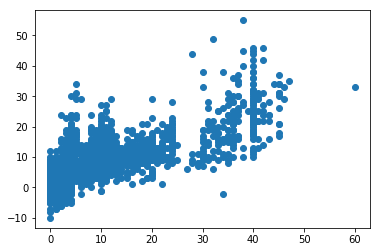

In [336]:
#Coefficients for each feature
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
print(coeff_df)

#Evaluate the model
prediction = lr.predict(X_test)
print(prediction)
predictions = np.around(prediction)
plt.scatter(y_test, predictions)

In [337]:
pred=lr.predict(X_train)
pred

array([10.80599531, 14.98886955,  3.34585661, ..., -3.17622919,
       12.90561179,  6.38931615])

In [338]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))
print('Kappa:', metrics.cohen_kappa_score(y_test, predictions, weights='quadratic'))

MAE: 4.11199589005908
MSE: 36.45003853069612
RMSE: 6.037386730258061
R^2: 0.5354515612881605
Kappa: 0.7039463443081417


In [314]:
#Kappa score is 70 so it is good for now

In [339]:
output=pd.DataFrame({'score':predictions[0:]})

In [341]:
output.to_excel('testscore.xls')